In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
exercise_data = pd.read_csv('exercise.csv')
calories_data = pd.read_csv('calories.csv')
df = pd.concat([exercise_data, calories_data['Calories']], axis=1)

df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [3]:
df = df.drop('User_ID', axis=1)
df.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [4]:
df.isnull().sum()

Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [5]:
df.shape

(15000, 8)

In [6]:
numerical_columns = df.columns[1:]

n_cols = 3
n_rows = int(np.ceil(len(numerical_columns) / n_cols))

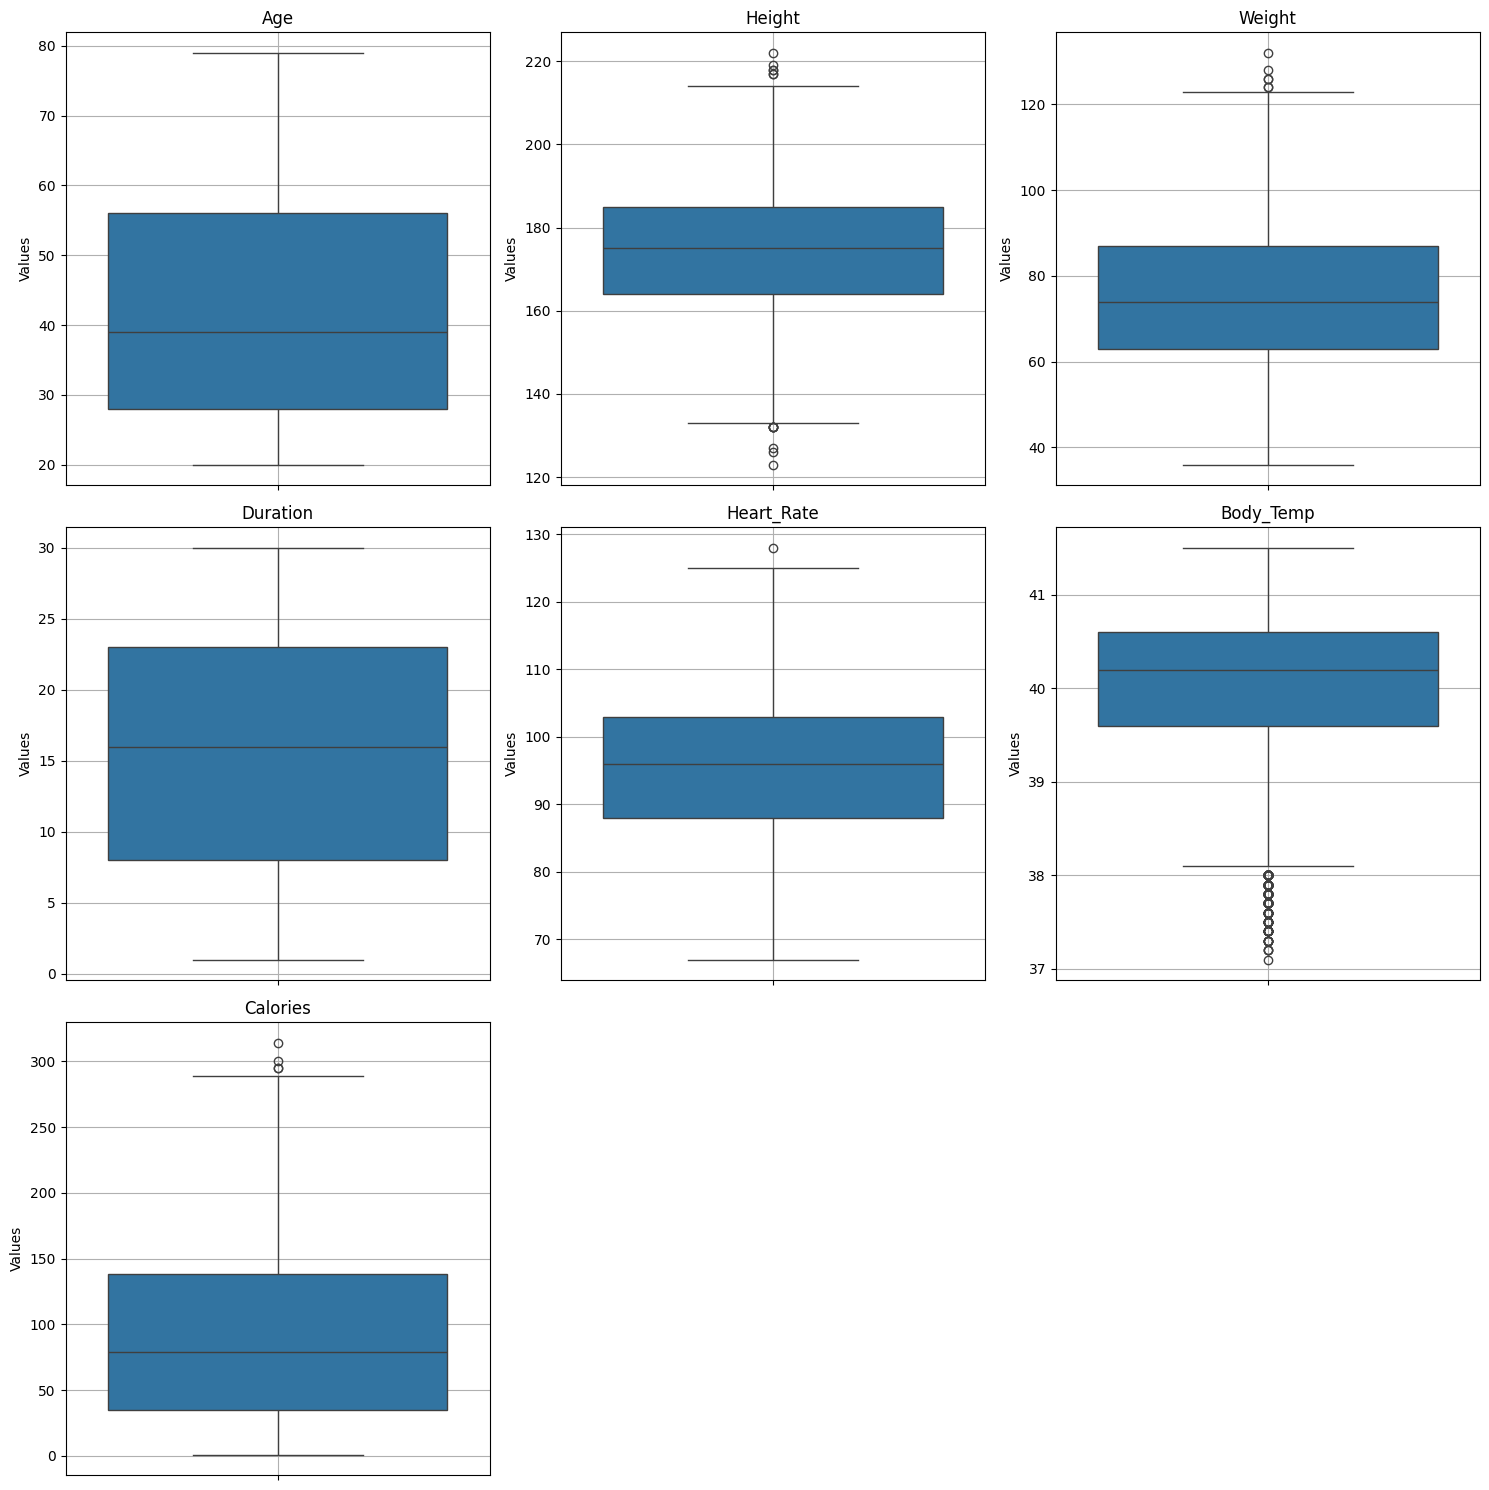

In [7]:
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 5 * n_rows))
axes = axes.flatten()

for index, column in enumerate(numerical_columns):
    sns.boxplot(data=df[column], ax=axes[index])
    axes[index].set_title(column)
    axes[index].set_ylabel('Values')
    axes[index].grid(True)
    
for i in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[i])
    
plt.tight_layout()
plt.show()

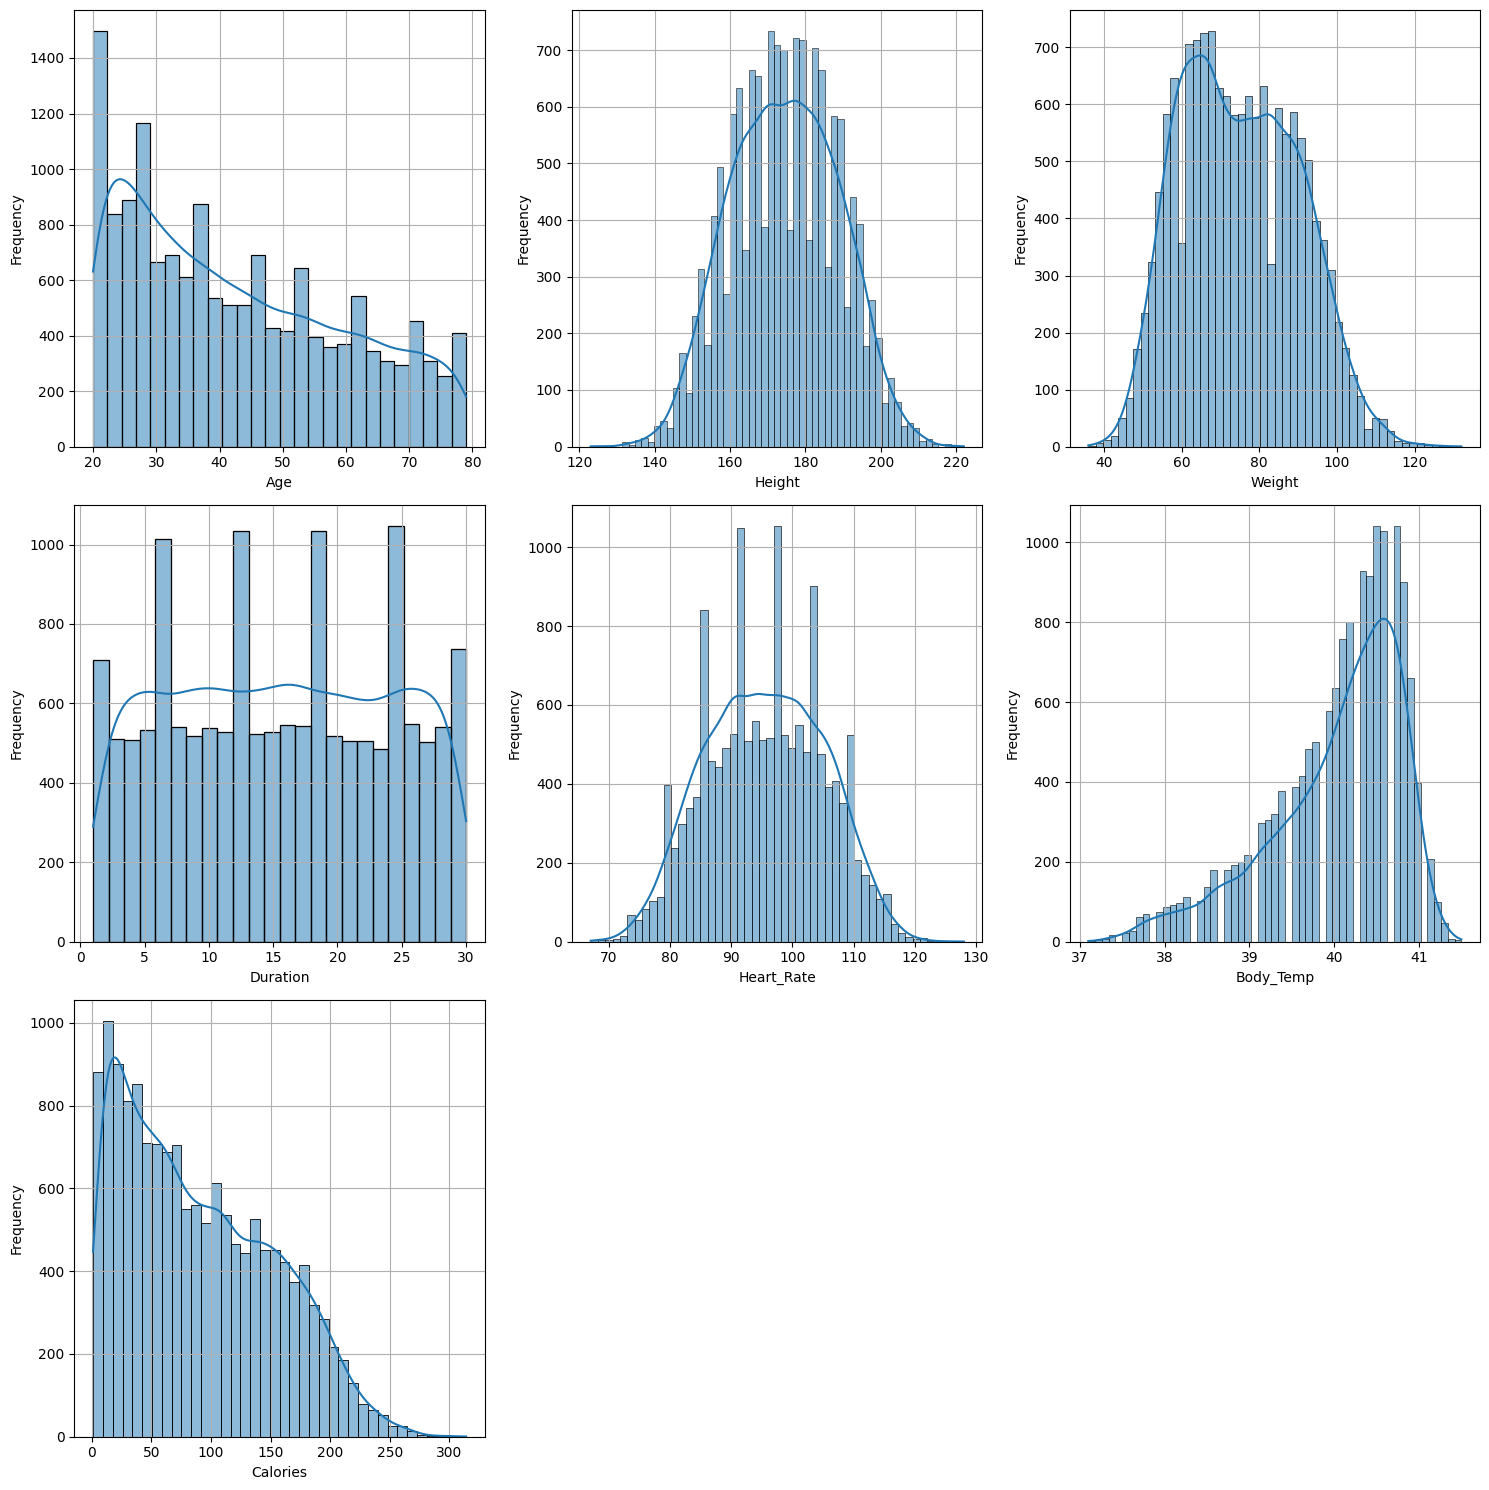

In [8]:
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 5 * n_rows))
axes = axes.flatten()

for index, column in enumerate(numerical_columns):
    sns.histplot(data=df[column], ax=axes[index], kde=True)
    axes[index].set_ylabel('Frequency')
    axes[index].grid(True)
    
for i in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[i])
    
plt.tight_layout()
plt.show()

In [9]:
for column in numerical_columns[:-1]:
    print(column, ':', df[column].skew())

Age : 0.47338270096138746
Height : -0.006189620437893538
Weight : 0.22672530725814513
Duration : 0.0047505366680978415
Heart_Rate : -0.01070407972854895
Body_Temp : -0.9943824155974582


In [10]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
df[numerical_columns[:-1]] = pt.fit_transform(df[numerical_columns[:-1]])

In [11]:
for column in numerical_columns[:-1]:
    print(column, ':', df[column].skew())

Age : 0.0013678810359863942
Height : -0.01339690569365734
Weight : -0.017261298687130854
Duration : -0.19405658980210802
Heart_Rate : -0.02051097790529695
Body_Temp : -0.13678908752235905


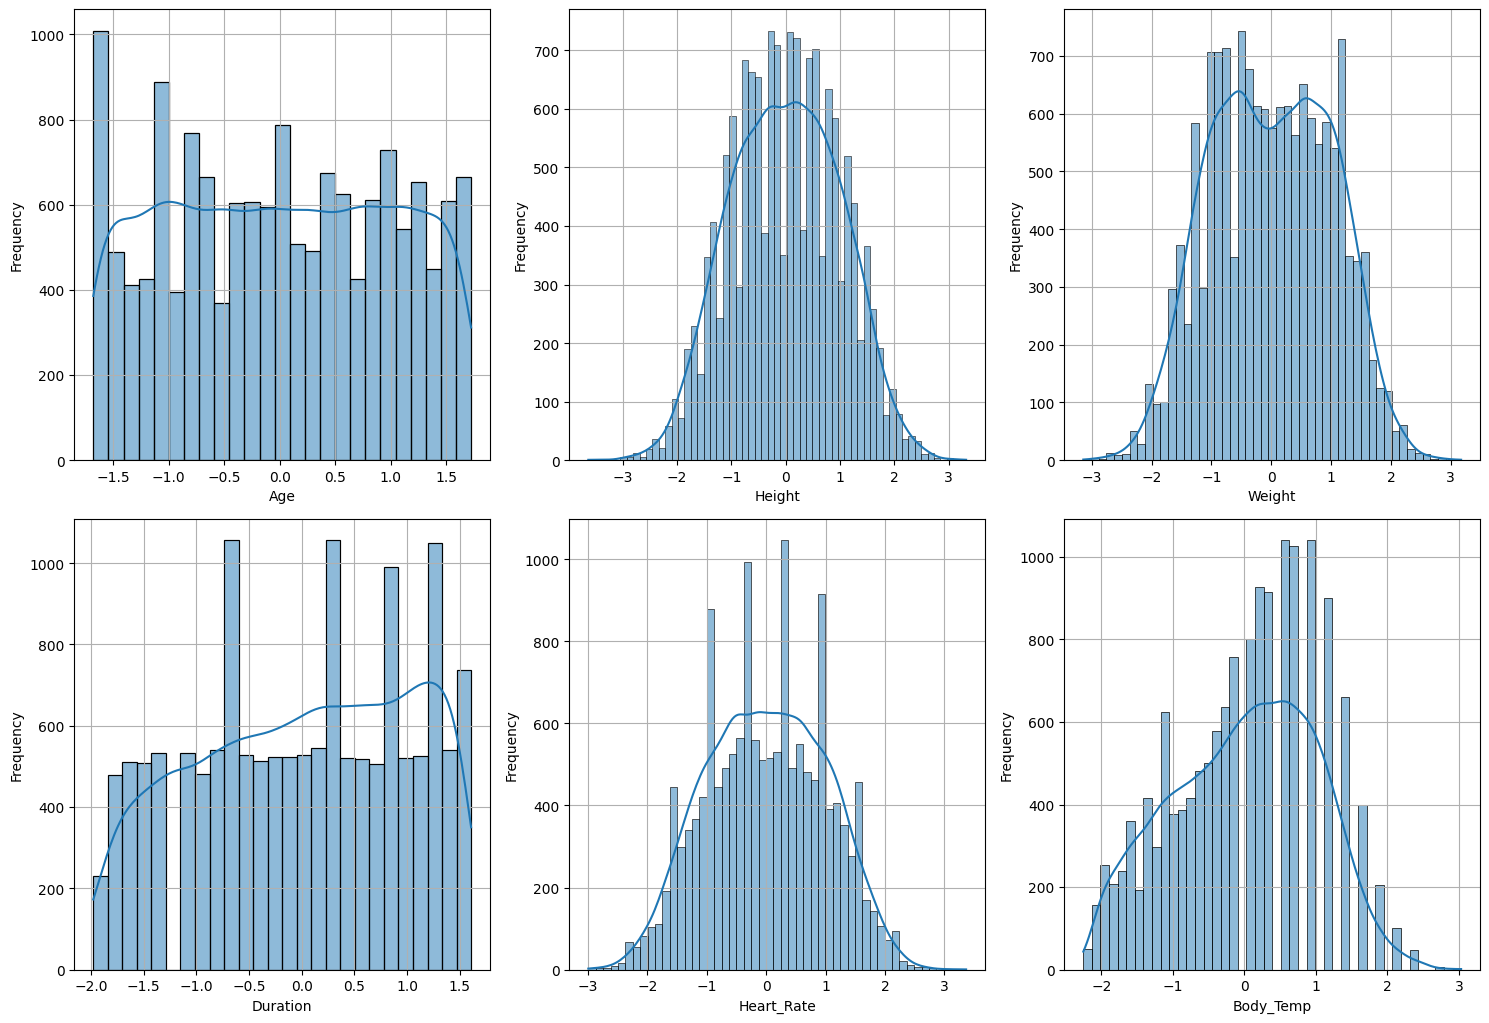

In [12]:
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 5 * n_rows))
axes = axes.flatten()

for index, column in enumerate(numerical_columns[:-1]):
    sns.histplot(data=df[column], ax=axes[index], kde=True)
    axes[index].set_ylabel('Frequency')
    axes[index].grid(True)
    
for i in range(len(numerical_columns[:-1]), len(axes)):
    fig.delaxes(axes[i])
    
plt.tight_layout()
plt.show()

In [13]:
df['Gender'] = pd.factorize(df['Gender'])[0] + 0
df.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,1.348857,1.089206,1.234770,1.509909,0.989317,1.162547,231.0
1,1,-1.678388,-0.592617,-0.998511,-0.106712,-0.156084,0.204772,66.0
2,0,1.385282,0.319475,0.327873,-1.295396,-0.783503,-1.551261,26.0
3,1,-0.374599,0.319475,-0.202239,-0.226825,0.469428,0.556529,71.0
4,1,-0.943419,-1.437039,-1.153216,-0.601668,-1.518083,-0.521098,35.0


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

X = df.iloc[:, :7]
Y = df.iloc[:, 7]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=101)

In [15]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(random_state=101)
rfr.fit(X_train, Y_train)

Y_pred_train = rfr.predict(X_train)
Y_pred_test = rfr.predict(X_test)

print('Trained Data :-')
print('Accuracy : ', r2_score(Y_train, Y_pred_train))
print('Mean Absolute Error : ', mean_absolute_error(Y_train, Y_pred_train))
print('Mean Squared Error : ', mean_squared_error(Y_train, Y_pred_train))
print('Root Mean Squared Error : ', mean_squared_error(Y_train, Y_pred_train, squared=False))

print('\nTest Data :-')
print('Accuracy : ', r2_score(Y_test, Y_pred_test))
print('Mean Absolute Error : ', mean_absolute_error(Y_test, Y_pred_test))
print('Mean Squared Error : ', mean_squared_error(Y_test, Y_pred_test))
print('Root Mean Squared Error : ', mean_squared_error(Y_test, Y_pred_test, squared=False))

Trained Data :-
Accuracy :  0.9996623557460766
Mean Absolute Error :  0.7093880597014927
Mean Squared Error :  1.3282948955223886
Root Mean Squared Error :  1.1525167658313646

Test Data :-
Accuracy :  0.9977558641134429
Mean Absolute Error :  1.8335090909090908
Mean Squared Error :  8.60072406060606
Root Mean Squared Error :  2.9326991084334


In [16]:
from xgboost import XGBRegressor

xgbr = XGBRegressor(random_state=101)
xgbr.fit(X_train, Y_train)

Y_pred_train = xgbr.predict(X_train)
Y_pred_test = xgbr.predict(X_test)

print('Trained Data :-')
print('Accuracy : ', r2_score(Y_train, Y_pred_train))
print('Mean Absolute Error : ', mean_absolute_error(Y_train, Y_pred_train))
print('Mean Squared Error : ', mean_squared_error(Y_train, Y_pred_train))
print('Root Mean Squared Error : ', mean_squared_error(Y_train, Y_pred_train, squared=False))

print('\nTest Data :-')
print('Accuracy : ', r2_score(Y_test, Y_pred_test))
print('Mean Absolute Error : ', mean_absolute_error(Y_test, Y_pred_test))
print('Mean Squared Error : ', mean_squared_error(Y_test, Y_pred_test))
print('Root Mean Squared Error : ', mean_squared_error(Y_test, Y_pred_test, squared=False))

Trained Data :-
Accuracy :  0.9996407571886317
Mean Absolute Error :  0.8711171814636212
Mean Squared Error :  1.4132637740724858
Root Mean Squared Error :  1.188807711142759

Test Data :-
Accuracy :  0.9988520158309083
Mean Absolute Error :  1.473913972546356
Mean Squared Error :  4.399686811946475
Root Mean Squared Error :  2.097543041738709


In [17]:
from xgboost import XGBRFRegressor

xgbrfr = XGBRFRegressor(random_state=101)
xgbrfr.fit(X_train, Y_train)

Y_pred_train = xgbrfr.predict(X_train)
Y_pred_test = xgbrfr.predict(X_test)

print('Trained Data :-')
print('Accuracy : ', r2_score(Y_train, Y_pred_train))
print('Mean Absolute Error : ', mean_absolute_error(Y_train, Y_pred_train))
print('Mean Squared Error : ', mean_squared_error(Y_train, Y_pred_train))
print('Root Mean Squared Error : ', mean_squared_error(Y_train, Y_pred_train, squared=False))

print('\nTest Data :-')
print('Accuracy : ', r2_score(Y_test, Y_pred_test))
print('Mean Absolute Error : ', mean_absolute_error(Y_test, Y_pred_test))
print('Mean Squared Error : ', mean_squared_error(Y_test, Y_pred_test))
print('Root Mean Squared Error : ', mean_squared_error(Y_test, Y_pred_test, squared=False))

Trained Data :-
Accuracy :  0.9863855533814432
Mean Absolute Error :  4.966306868263738
Mean Squared Error :  53.559329793587196
Root Mean Squared Error :  7.318423996571065

Test Data :-
Accuracy :  0.9843859414011669
Mean Absolute Error :  5.266340056477171
Mean Squared Error :  59.84138940923083
Root Mean Squared Error :  7.735721647605401


In [18]:
import pickle

with open('CaloriesBurnt_Predictor.pkl', 'wb') as file:
    pickle.dump({'model': xgbr, 'transformer': pt}, file)
    
with open('CaloriesBurnt_Predictor.pkl', 'rb') as file:
    data = pickle.load(file)
    loaded_model = data['model']
    
print('Accuracy of the loaded model : ', loaded_model.score(X_test, Y_test))

Accuracy of the loaded model :  0.9988520158309083
